In [1]:
#Step 0: Install Required Libraries

In [2]:
pip install mlxtend pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Step 1: Import Required Libraries

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

In [5]:
#Step 2: Prepare Datasets

In [6]:
# Load the course and review datasets
course_df = pd.read_csv('course_data.csv')  # Replace with the name of your course file
review_df = pd.read_csv('review_data.csv')  # Replace with the name of your review file

# Check the first few rows of the datasets
print("Course Dataset:")
print(course_df.head())
print("Course Review Dataset:")
print(review_df.head())


Course Dataset:
                                                name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  \
0        Stanford University   
1      University of Alberta   
2            Yale University   
3                     Google   
4  Google - Spectrum Sharing   

                                          course_url  \
0    https://www.coursera.org/learn/machine-learning   
1   https://www.coursera.org/learn/indigenous-canada   
2  https://www.coursera.org/learn/the-science-of-...   
3  https://www.coursera.org/learn/technical-suppo...   
4  https://www.coursera.org/learn/google-cbrs-cpi...   

                        course_id  
0                machine-learning  
1               indigenous-canada  
2       t

In [7]:

# Create a list of transactions (each transaction will be a set of courses the user has reviewed)
# TransactionEncoder will convert this into a one-hot encoded format
# Assuming each row in review_df has 'reviewers' and 'course_id'
transactions = review_df.groupby('reviewers')['course_id'].apply(list).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows
#print(df.head())
df.head()


,aboriginal-education,access-control-sscp,accounting-analytics,accounting-data-analytics-python,actualizacion-manejo-diabetes-tipo-2,addiction-and-the-brain,addiction-treatment,advanced-valuation-and-strategy,agile-atlassian-jira,ai-for-everyone,...,what-is-compliance,what-is-datascience,what-is-social,wind-energy,wine,womens-health-human-rights,write-a-feature-length-screenplay-for-film-or-television,write-your-first-novel,writing-editing-words,writing-for-business
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Remove duplicates from each user's course list
transactions_cleaned = [list(set(transaction)) for transaction in transactions]

# Display the first few cleaned transactions
print(transactions_cleaned[:5])


[['grammar-punctuation'], ['python-data'], ['guitar'], ['uva-darden-digital-product-management'], ['speak-english-professionally']]


In [9]:
#Step 3: Frequent Itemset Generation

In [10]:
from mlxtend.frequent_patterns import apriori

# Convert the cleaned transactions into a one-hot encoded format using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions_cleaned).transform(transactions_cleaned)

# Convert the transformed array into a DataFrame for better readability
df_cleaned = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori to find frequent itemsets with a minimum support threshold (e.g., 0.01)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets)


     support                                  itemsets
0   0.024673                         (ai-for-everyone)
1   0.010486                  (aprendiendo-a-aprender)
2   0.010114                       (careerdevelopment)
3   0.015927                     (computer-networking)
4   0.019986                   (data-scientists-tools)
5   0.020559                     (deep-neural-network)
6   0.024694                        (excel-essentials)
7   0.010580                (financial-markets-global)
8   0.016719                         (food-and-health)
9   0.019659                        (gcp-fundamentals)
10  0.015364                     (grammar-punctuation)
11  0.010743  (html-css-javascript-for-web-developers)
12  0.010333                 (introduction-psychology)
13  0.012178                           (learn-chinese)
14  0.020427                            (learn-korean)
15  0.038387                   (learning-how-to-learn)
16  0.039912                        (machine-learning)
17  0.0163

In [11]:
#Step 4: Generate Association Rules

In [12]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.50, num_itemsets=.5)

# Display the first few rules
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(python-data),(python),0.037254,0.048862,0.010205,0.273923,5.605999,1.0,0.008384,1.309967,0.853413,0.134429,0.236622,0.241384
1,(python),(python-data),0.048862,0.037254,0.010205,0.208846,5.605999,1.0,0.008384,1.216888,0.863828,0.134429,0.178232,0.241384


In [13]:
# Filter rules based on confidence and lift thresholds
filtered_rules = rules[(rules['confidence'] > 0.2) & (rules['lift'] > 1.5)]
# Check the number of filtered rules after adjustment
print(f"Number of filtered rules: {len(filtered_rules)}")
# Display the filtered rules
print(filtered_rules.head())


Number of filtered rules: 2
     antecedents    consequents  antecedent support  consequent support  \
0  (python-data)       (python)            0.037254            0.048862   
1       (python)  (python-data)            0.048862            0.037254   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.010205    0.273923  5.605999               1.0  0.008384    1.309967   
1  0.010205    0.208846  5.605999               1.0  0.008384    1.216888   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.853413  0.134429   0.236622    0.241384  
1       0.863828  0.134429   0.178232    0.241384  


In [14]:
#Step 4.1: Visualize the Association Rules 

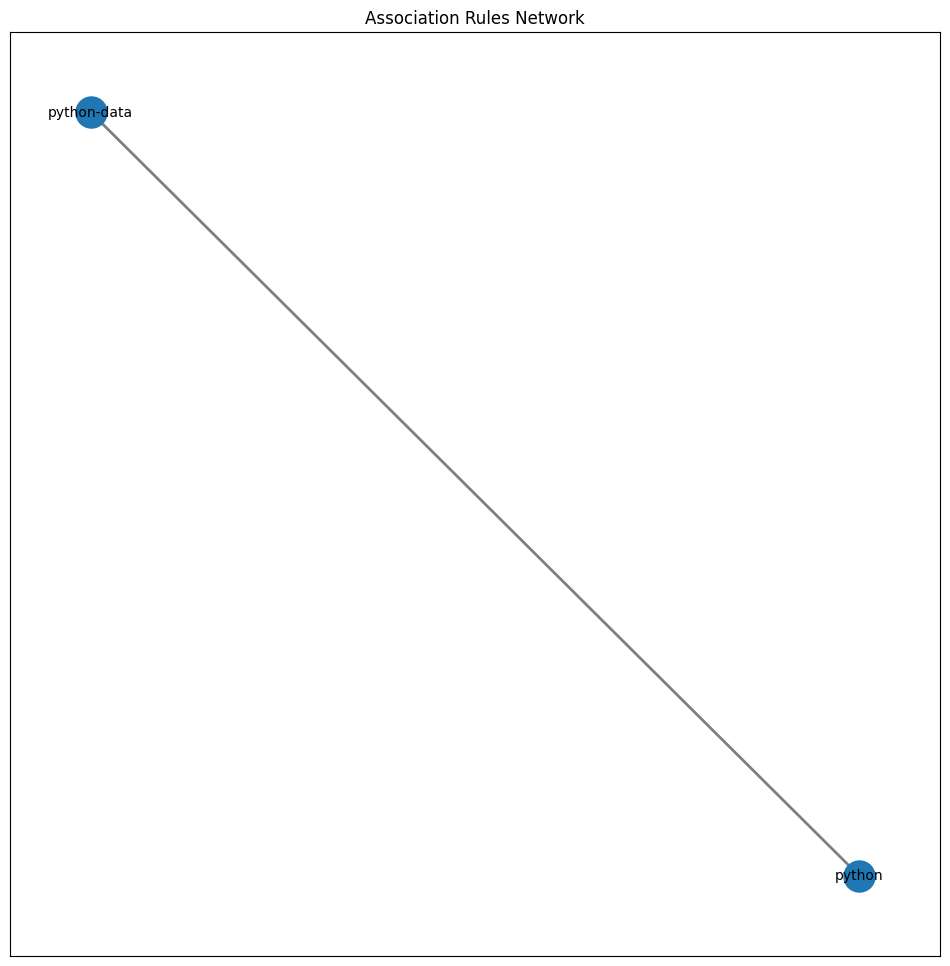

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges based on association rules
for _, row in filtered_rules.iterrows():
    antecedent = ' '.join(list(row['antecedents']))
    consequent = ' '.join(list(row['consequents']))
    G.add_edge(antecedent, consequent, weight=row['lift'])

# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1, iterations=20)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Association Rules Network")
plt.show()


In [16]:
# Visualize the Association Rules (Lift vs Confidence)

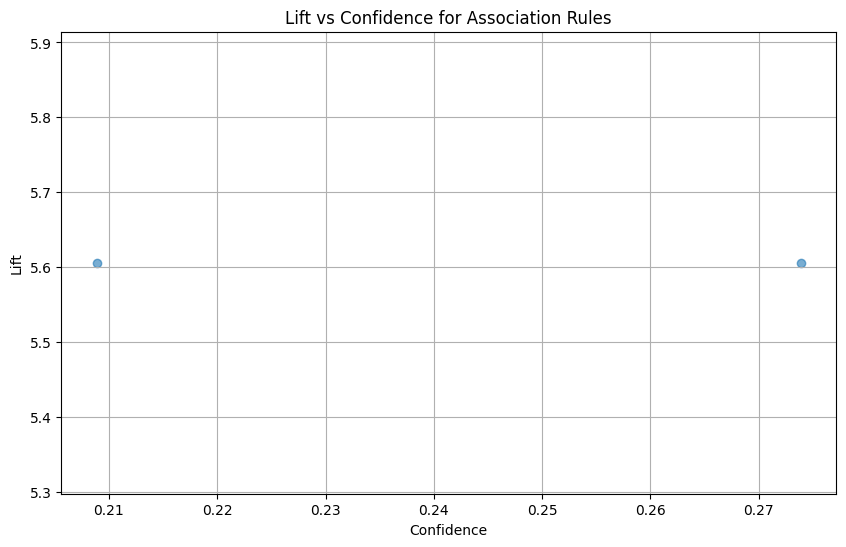

In [17]:
import matplotlib.pyplot as plt

# Plot Lift vs Confidence
plt.figure(figsize=(10, 6))
plt.scatter(filtered_rules['confidence'], filtered_rules['lift'], alpha=0.6)
plt.title('Lift vs Confidence for Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


In [18]:
#2: Support vs Confidence (Bubble Plot)

In [19]:
# Analyze Strongest Rules
# Sort the rules by lift
strongest_rules = filtered_rules.sort_values('lift', ascending=False)

# Display the top 10 strongest rules
strongest_rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(python),(python-data),0.048862,0.037254,0.010205,0.208846,5.605999,1.0,0.008384,1.216888,0.863828,0.134429,0.178232,0.241384
0,(python-data),(python),0.037254,0.048862,0.010205,0.273923,5.605999,1.0,0.008384,1.309967,0.853413,0.134429,0.236622,0.241384


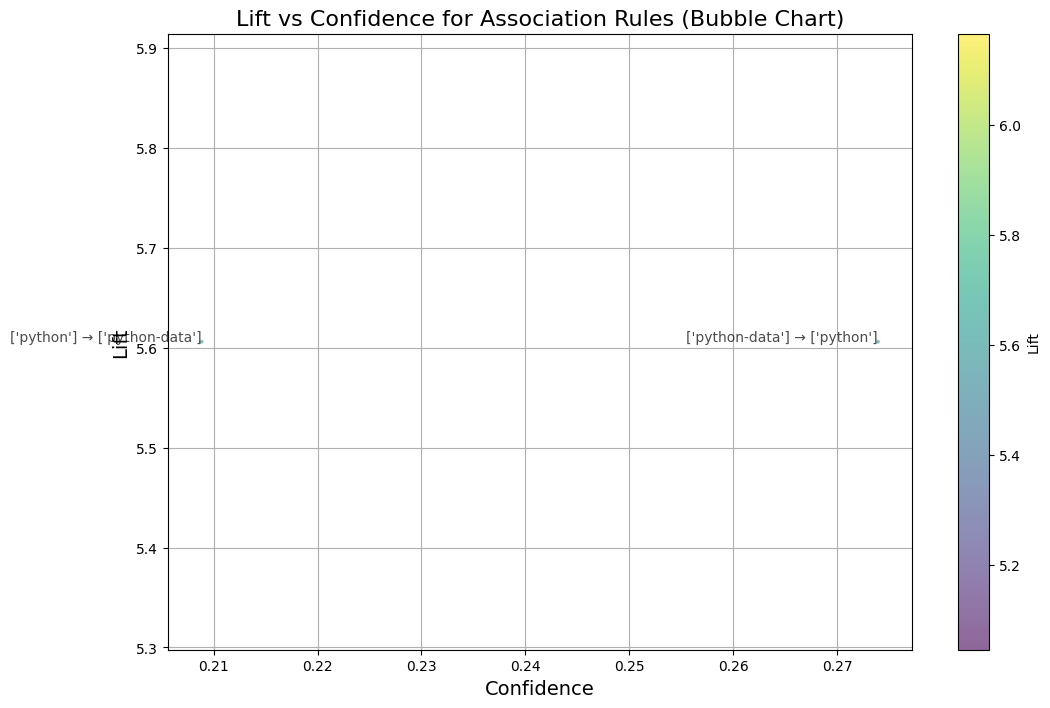

In [20]:
import matplotlib.pyplot as plt

# Plot Bubble Chart for Lift vs Confidence, with size as support and color as lift
plt.figure(figsize=(12, 8))

# Bubble chart: size = support, color = lift
plt.scatter(
    filtered_rules['confidence'], 
    filtered_rules['lift'], 
    s=filtered_rules['support'] * 1000,  # Scale the support for better visibility
    c=filtered_rules['lift'],  # Color by lift
    cmap='viridis',  # Use a colormap for better distinction
    alpha=0.6,  # Make the points slightly transparent
    edgecolors="w",  # Add white edge to points for better contrast
)

# Add title and labels
plt.title('Lift vs Confidence for Association Rules (Bubble Chart)', fontsize=16)
plt.xlabel('Confidence', fontsize=14)
plt.ylabel('Lift', fontsize=14)
plt.colorbar(label='Lift')  # Show color scale
plt.grid(True)

# Annotate points with antecedent and consequent course names
for i in range(len(filtered_rules)):
    plt.annotate(f'{list(filtered_rules["antecedents"].iloc[i])} → {list(filtered_rules["consequents"].iloc[i])}', 
                 (filtered_rules['confidence'].iloc[i], filtered_rules['lift'].iloc[i]),
                 fontsize=10, ha='right', alpha=0.7)

# Show plot
plt.show()


In [21]:
#Step 5: Full for Recommendations

In [22]:
import pandas as pd

# Assuming `rules` is your DataFrame containing the association rules
# Example rule format: antecedents, consequents, support, confidence, lift, etc.

# Function to recommend courses based on a list of already taken courses
def recommend_courses(user_courses, rules, top_n=5):
    recommended_courses = []

    for course in user_courses:
        # Find rules where the antecedent matches the user's courses
        matching_rules = rules[rules['antecedents'].apply(lambda x: course in x)]

        # For each rule, suggest the consequent courses (right side of the rule)
        for _, rule in matching_rules.iterrows():
            consequents = list(rule['consequents'])
            for consequent in consequents:
                # Avoid recommending the same course the user has already taken
                if consequent not in user_courses and consequent not in recommended_courses:
                    recommended_courses.append(consequent)

    # Limit to top N recommendations based on their confidence (stronger rules have higher confidence)
    recommended_courses = sorted(recommended_courses, key=lambda x: rules[rules['consequents'].apply(lambda y: x in y)]['confidence'].max(), reverse=True)

    return recommended_courses[:top_n]

# Example usage:
user_courses = ['python-data', 'machine-learning']
recommended = recommend_courses(user_courses, rules, top_n=5)

print(f"Recommended Courses for the user who takes:{user_courses} is: {recommended}")


Recommended Courses for the user who takes:['python-data', 'machine-learning'] is: ['python']


In [23]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Assuming you have a DataFrame `review_df` with columns ['user_id', 'course_id']

# Step 1: Create transactions based on users' courses
transactions = review_df.groupby('reviewers')['course_id'].apply(list).tolist()

# Step 2: Apply TransactionEncoder to convert the transactions into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Generate frequent itemsets using the A-priori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)  # Lower min_support for more frequent itemsets

# Step 4: Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2, num_itemsets =.3)  # Lower lift threshold

# Step 5: Filter rules based on confidence and lift thresholds
filtered_rules = rules[(rules['confidence'] > 0.1) & (rules['lift'] > 1.5)]  # Adjusted confidence and lift thresholds

# Display the filtered rules
print(f"Filtered Rules: \n{filtered_rules.head()}")

# Step 6: Generate recommendations for each user based on the rules
def recommend_courses(user_courses):
    recommendations = set()
    for index, rule in filtered_rules.iterrows():
        if set(rule['antecedents']).issubset(user_courses):
            recommendations.update(rule['consequents'])
    return list(recommendations)

# Example: Get recommendations for a user who has taken 'python-data' and 'machine-learning'
user_courses = ['python-data', 'machine-learning']
recommended_courses = recommend_courses(user_courses)

print(f"Recommended Courses for the user who takes:{user_courses}, is: {recommended_courses}")


Filtered Rules: 
     antecedents    consequents  antecedent support  consequent support  \
0  (python-data)       (python)            0.037254            0.048862   
1       (python)  (python-data)            0.048862            0.037254   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.010205    0.273923  5.605999               1.0  0.008384    1.309967   
1  0.010205    0.208846  5.605999               1.0  0.008384    1.216888   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.853413  0.134429   0.236622    0.241384  
1       0.863828  0.134429   0.178232    0.241384  
Recommended Courses for the user who takes:['python-data', 'machine-learning'], is: ['python']
